In [4]:
#Resolution function of the detector in R68

In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
#Set up notebook and load some R68 constants (V, eps, etc.)
exec(open("nb_setup.py").read())#Is there a better way to do this?
import constants as const

../mplstyles
3.1.1
/data/chocula/mast/cdms/analysis/run068/R68_paper2019/mplstyles


In [6]:
import R68_spec_tools as st

In [7]:
V=const.V
G_NTL=const.G_NTL
F=const.F
    
#Params from Matt's Bkg resolution fit:
#https://zzz.physics.umn.edu/cdms/doku.php?id=cdms:k100:run_summary:run_68:run_68_panda:calibration#resolution_versus_energy
sigma0=const.sigma0 #eV 
B=const.B #This includes FANO

#B_1=B-F*eps #Actually only true for V->inf (http://www.hep.umn.edu/cdms/cdms_restricted/K100/analysis/Peak_Widths.pdf)
B_1=B-F*V**2/eps/(1+V/eps)**2
A=const.A

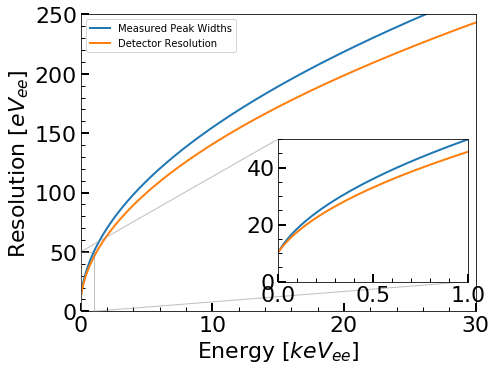

In [38]:
fig_w=7
fig,ax = plt.subplots(1,1,figsize=(fig_w, fig_w*(.75)))

E_keV=np.linspace(0,30,1000)#[keVee]
E_eV = E_keV*1e3

ax.plot(E_keV,st.sigma_ee(E_eV,sigma0,B,A),label='Measured Peak Widths')
ax.plot(E_keV,st.sigma_ee(E_eV,sigma0,B_1,A),label='Detector Resolution')

ax.set_xlabel(r'Energy $[keV_{ee}]$')
ax.set_ylabel(r'Resolution $[eV_{ee}]$')

ax.set_xlim(0,30)
ax.set_ylim(0,250)
ax.legend()

axins = ax.inset_axes([0.5, 0.1, 0.48, 0.48])
axins.plot(E_keV,st.sigma_ee(E_eV,sigma0,B,A))
axins.plot(E_keV,st.sigma_ee(E_eV,sigma0,B_1,A))

axins.set_xlim(0,1)
axins.set_ylim(0,50)

ax.indicate_inset_zoom(axins)


plt.tight_layout()
plt.savefig('figures/det_res.png')